# Linear Regression

对于样本: $\{x_{1}, y_{1}\}, \{x_{2}, y_{2}\},\dots,\{x_{m}, y_{m}\}$

参数：$\theta_{0}, \theta_{1}$

假设函数：
$$
h_{\theta}(x) = \theta_{0} + \theta_{1}x
$$

代价函数：
$$
J_{(\theta_{0}, \theta_{1})} = \frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x_{i}) - y_{i}) ^ 2
$$

目标：找到$\theta_{0}, \theta_{1}$，使$J_{(\theta_{0}, \theta_{1})}$ 最小

注：$(\frac{1}{2})$ 是为了便利的计算代价函数的导数，用于梯度下降。

### 梯度下降算法

$\alpha$ : 学习速率

$$
\begin{align*}
& \text{repeat until convergence } \{ \\
& \quad\theta_{j} := \theta_{j} - \alpha\frac{\partial}{\partial\theta_{j}}J_{(\theta_{0}, \theta_{1})} \quad \textrm{(for j = 0 and j = 1)} \\
& \} \\
\end{align*}
$$

计算导数后得:
$$
\begin{align*}
& \text{repeat until convergence } \{ \\
& \quad\theta_{j} := \theta_{j} - \alpha\frac{1}{m}\sum_{i=1}^m[(h_{\theta}(x_{i}) - y_{i})\cdot x_{i}] \quad \textrm{(for j = 0 and j = 1)} \\
& \} \\
\end{align*}
$$

注：$\{\theta_{0},\theta_{1},\dots,\theta_{j}\}$ 需要同步更新

### 生成学习数据

In [1]:
import numpy as np

def generate_data(num):
    x = np.linspace(0, 10, num)
    # 添加 bias
    b = np.random.randn(num) + 5
    y = x * 3.6 + b
    return x, y

In [2]:
import matplotlib.pyplot as plt

x, y = generate_data(100)
plt.plot(x, y, 'o')
plt.show()

<Figure size 640x480 with 1 Axes>

### 定义 $\theta_0, \theta_1$

In [3]:
theta_0 = 0
theta_1 = np.random.rand()

def init_theta():
    global theta_0, theta_1
    theta_0 = 0
    theta_1 = np.random.rand()

### 假设函数 

In [4]:
def h_x(x, theta_0, theta_1):
    return x * theta_1 + theta_0

### 代价函数

In [5]:
def j_x(h, y):
    m = len(h)
    return np.sum((h - y) ** 2) * 0.5 / m

### 更新 $\theta_0, \theta_1$

In [6]:
def update_theta(h, x, y, alpha):
    global theta_0, theta_1
    m = len(h)
    theta_0 -= alpha * np.sum(h - y) / m
    theta_1 -= alpha * np.sum((h - y) * x) / m

### 训练

In [12]:
def train(t):
    J_history = []
    init_theta()
    for i in range(t):
        h = h_x(x, theta_0, theta_1)
        J_history.append(j_x(h, y))
        update_theta(h, x, y, 0.01)
    
    return J_history

3.6856174126193753 3.7937253820249976


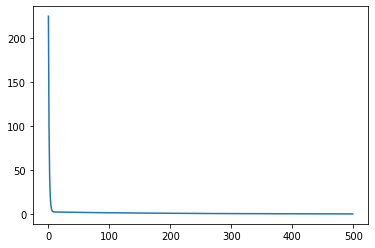

In [13]:
J_history = train(500)
print(theta_0, theta_1)
plt.plot(J_history)
plt.show()

### 显示预测数据

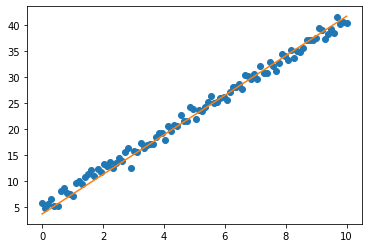

In [14]:
plt.plot(x, y, 'o')
plt.plot(x, x * theta_1 + theta_0)
plt.show()

## 正规方程解法

### 公式：

$$
\Theta = (X^T\cdot X)^{-1}\cdot X^T\cdot Y
$$

可以直接算出 $\Theta$ 的最佳解。

### 优缺点
优点|缺点
----|----
不需要选择学习速率|需要计算 $(X^T\cdot X)^{-1}$，计算量：$O(n^3)$
不需要迭代|不适用于大数据量

### 适用范围

- $n \leq 10000$
- $X^T\cdot X$ 可逆(即需要样本数量 m $\gg$ 特征数量n)

In [10]:
def normal_equation(x, y):
    x = np.c_[np.ones(x.shape[0]), x]
    return np.linalg.inv(x.T @ x) @ x.T @ y

In [11]:
print(normal_equation(x.reshape(len(x), 1), y.reshape(len(y), 1)))

[[4.96405959]
 [3.60149858]]
